In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
from sklearn.model_selection import train_test_split

#comment below if not using ipython notebook
%matplotlib inline

In [423]:
df = pd.read_csv('Assignment3.csv')
for col in df.columns:
    df[col] = df[col].astype(float)
    
df.head()
print(df.shape)


(101, 6)


In [424]:
xx = np.array(df[['x1','x2','x3','x4','x5']])
yy = np.expand_dims(df['y'], 1)

In [425]:
def SSE(y, yhat):
    return np.sum((y-yhat)**2)
    

In [480]:
df

,x1,x2,x3,x4,x5,y
0,7.11,-447.71,135.66,92.41,96.04,9131.40
1,7.06,-455.33,94.49,91.76,92.16,9001.86
2,6.89,-466.86,186.25,89.54,100.00,8595.85
3,7.25,-440.53,176.83,94.24,84.64,9469.94
4,7.24,-445.92,185.90,94.11,88.36,9448.98
...,...,...,...,...,...,...
96,7.86,479.03,187.04,102.18,88.36,11168.68
97,8.37,489.50,159.51,108.85,81.00,12605.81
98,8.32,496.95,17.12,108.16,92.16,12467.96
99,8.37,546.88,104.18,108.83,100.00,12631.05


In [427]:
df.describe()

,x1,x2,x3,x4,x5,y
count,101.00,101.00,101.00,101.00,101.00,101.00
mean,7.55,23.76,111.37,98.13,34.00,10244.46
std,0.38,292.85,55.81,4.94,30.56,1022.77
min,6.68,-466.86,9.80,86.83,0.00,8062.54
25%,7.25,-208.89,66.38,94.24,6.76,9469.94
50%,7.53,38.95,104.18,97.90,25.00,10187.66
75%,7.80,262.92,168.16,101.42,57.76,10866.63
max,8.37,546.88,195.81,108.85,100.00,12631.05


## TASK 1

In [428]:
from sklearn import linear_model
model1 = linear_model.LinearRegression()
model1.fit(xx, yy)
yhat = model1.predict(xx)
loss = SSE(yy, yhat)
print("Beta :", model1.coef_, " Bias :", model1.intercept_)
print("RMSE :",np.sqrt(loss/101))

Beta : [[-1.06736899e+03  1.00659916e-01 -5.71765977e-02  2.84363302e+02
   1.62848730e+00]]  Bias : [-9655.31030896]
RMSE : 26.676989999758423


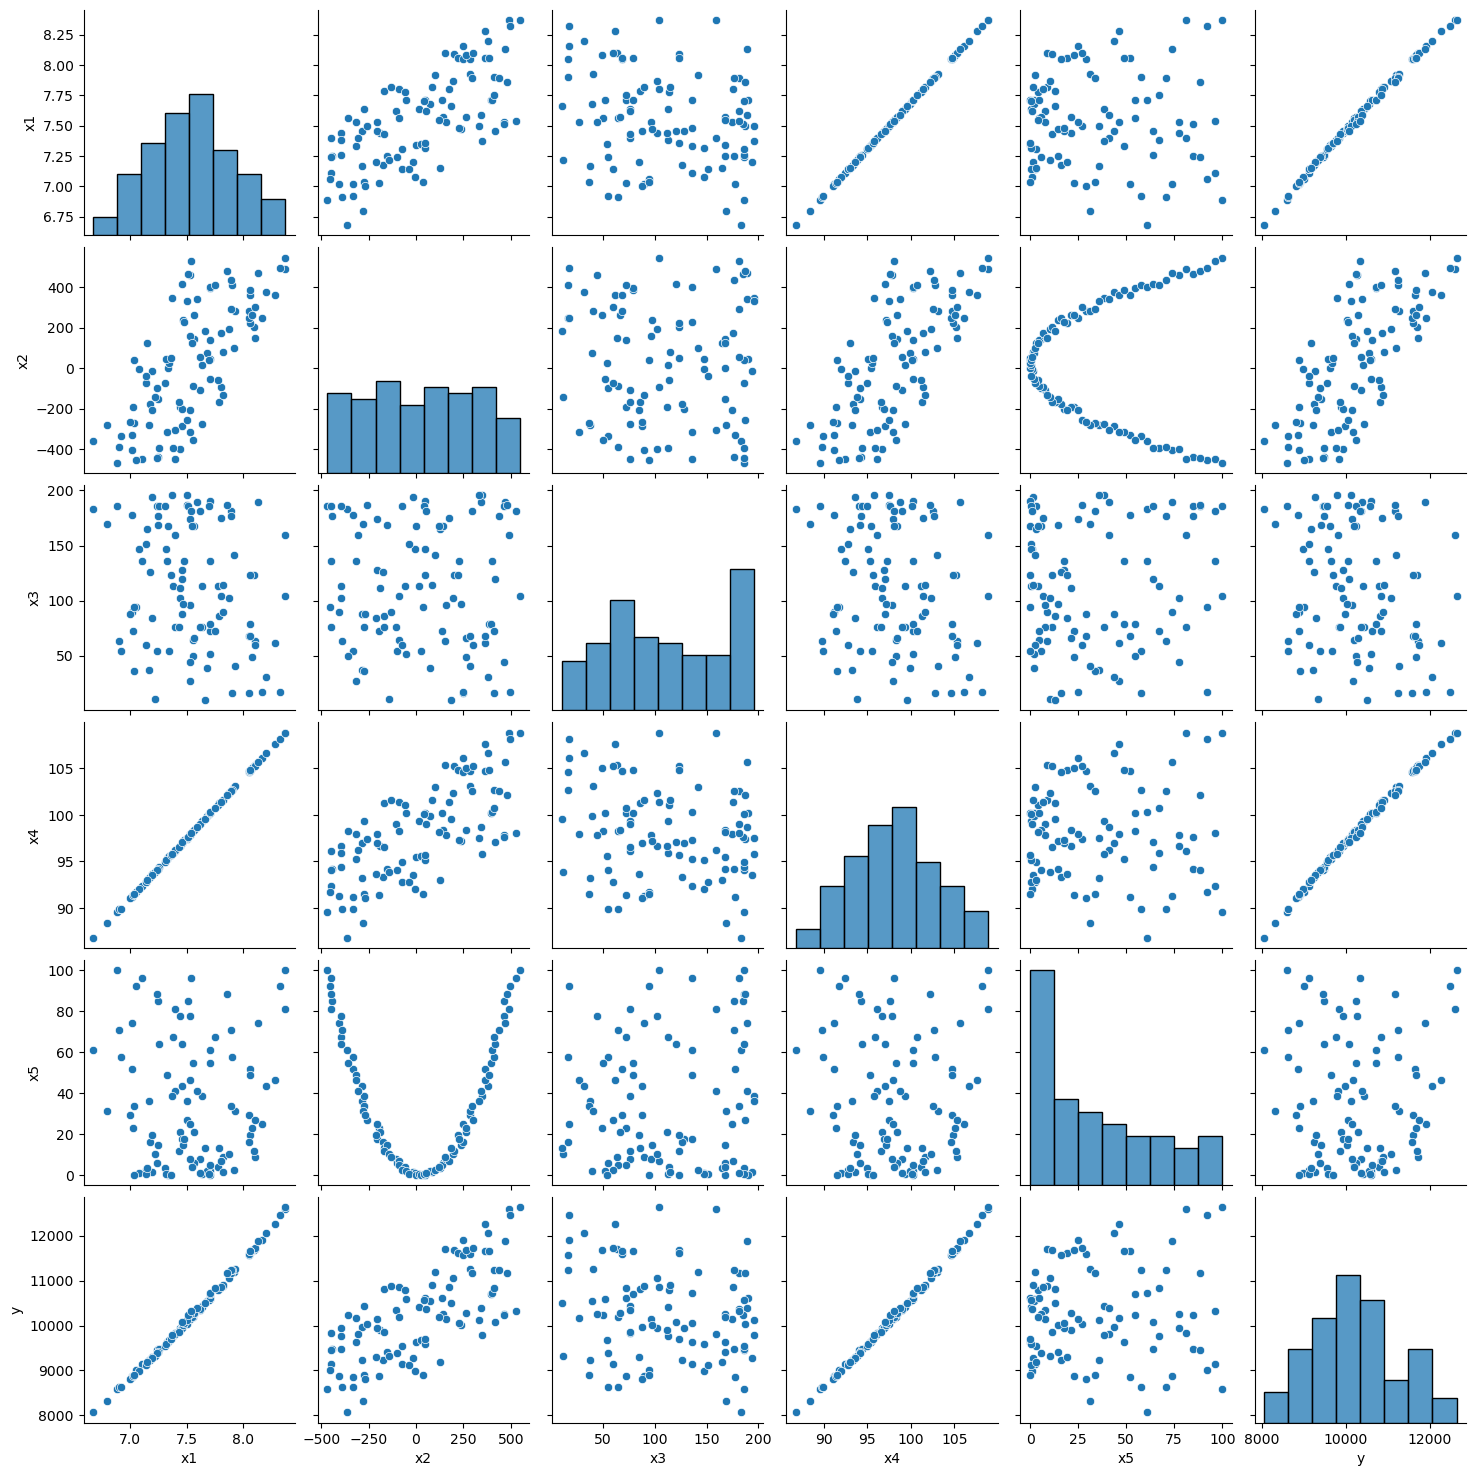

In [429]:
sb.pairplot(df)

In [481]:
corr_matrix = df.corr()
corr_matrix

,x1,x2,x3,x4,x5,y
x1,1.00,0.70,-0.22,1.00,-0.00,1.00
x2,0.70,1.00,-0.03,0.70,0.00,0.72
x3,-0.22,-0.03,1.00,-0.22,0.08,-0.22
x4,1.00,0.70,-0.22,1.00,-0.00,1.00
x5,-0.00,0.00,0.08,-0.00,1.00,0.05
y,1.00,0.72,-0.22,1.00,0.05,1.00


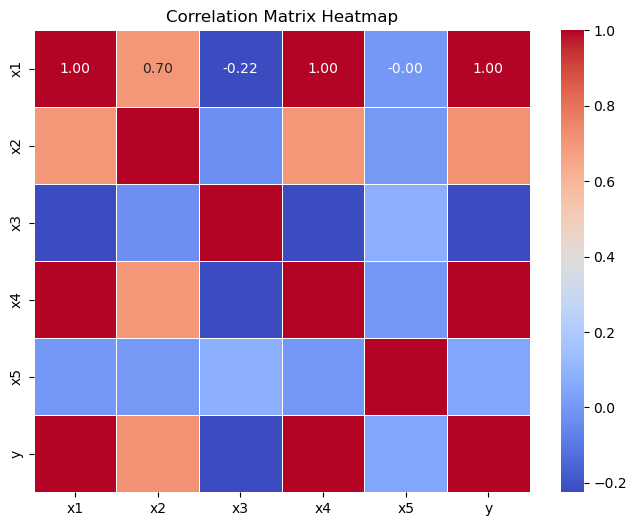

In [490]:
plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


## TASK 2

In [432]:
# As x3 has negative corellation lets try removing it from data set.
new_X=df.drop(['x3','x1'],axis=1)

In [433]:
new_X

,x2,x4,x5,y
0,-447.71,92.41,96.04,9131.40
1,-455.33,91.76,92.16,9001.86
2,-466.86,89.54,100.00,8595.85
3,-440.53,94.24,84.64,9469.94
4,-445.92,94.11,88.36,9448.98
...,...,...,...,...
96,479.03,102.18,88.36,11168.68
97,489.50,108.85,81.00,12605.81
98,496.95,108.16,92.16,12467.96
99,546.88,108.83,100.00,12631.05


In [434]:
new_corr=new_X.corr()
new_corr

,x2,x4,x5,y
x2,1.00,0.70,0.00,0.72
x4,0.70,1.00,-0.00,1.00
x5,0.00,-0.00,1.00,0.05
y,0.72,1.00,0.05,1.00


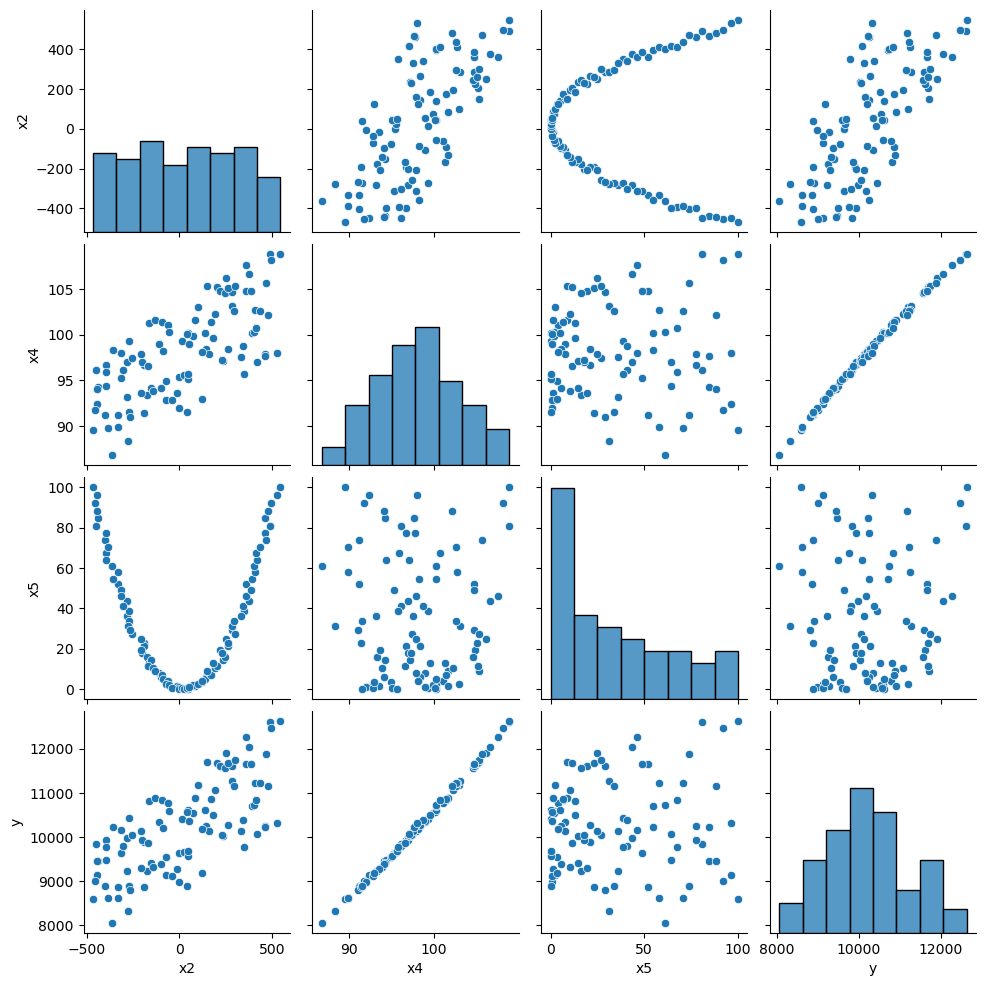

In [435]:
sb.pairplot(new_X)

In [436]:
new_X=new_X.drop(['y'],axis=1)

In [437]:
y

0      9131.40
1      9001.86
2      8595.85
3      9469.94
4      9448.98
        ...   
96    11168.68
97    12605.81
98    12467.96
99    12631.05
100   10327.89
Name: y, Length: 101, dtype: float64

In [438]:
model2 = linear_model.LinearRegression()
model2.fit(new_X, y)
yhat = model2.predict(new_X)
loss = SSE(y, yhat)
print("Beta :", model1.coef_, " Bias :", model2.intercept_)
print("LOSS : ",loss)
print("RMSE:",np.sqrt(loss/101))

Beta : [[-1.06736899e+03  1.00659916e-01 -5.71765977e-02  2.84363302e+02
   1.62848730e+00]]  Bias : -9677.444783749668
LOSS :  73828.92242762663
RMSE: 27.036631261614332


#### In task 1 the RMSE is 26 after removing the columns x3 and x1 the loss is increased to 27.

#### -->As we can observe the data has different range of values for different columns, this can create disturbance in modeling the data. 
#### --> TO avoid this lets first convert data into a standard form using StandardScaler method or MinMaxScaler method

In [439]:
from sklearn.preprocessing import MinMaxScaler
xx = np.array(df[['x1','x2','x3','x4','x5']])
yy = np.expand_dims(df['y'], 1)
x=df.drop(['y'],axis=1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(xx)
y_scaled = scaler.fit_transform(yy.reshape(-1, 1)) 
# Combine scaled features and target back into a DataFrame if needed
df_scaled_minmax = pd.DataFrame(X_scaled, columns=x.columns)
df_scaled_minmax['y'] = y_scaled
df_scaled_minmax



,x1,x2,x3,x4,x5,y
0,0.25,0.02,0.68,0.25,0.96,0.23
1,0.22,0.01,0.46,0.22,0.92,0.21
2,0.12,0.00,0.95,0.12,1.00,0.12
3,0.34,0.03,0.90,0.34,0.85,0.31
4,0.33,0.02,0.95,0.33,0.88,0.30
...,...,...,...,...,...,...
96,0.70,0.93,0.95,0.70,0.88,0.68
97,1.00,0.94,0.80,1.00,0.81,0.99
98,0.97,0.95,0.04,0.97,0.92,0.96
99,1.00,1.00,0.51,1.00,1.00,1.00


In [440]:
xmin = np.array(df_scaled_minmax[['x1','x2','x3','x4','x5']])
ymin = np.expand_dims(df_scaled_minmax['y'], 1)
X_train, X_test, y_train, y_test = train_test_split(xmin, ymin, test_size=0.2, random_state=42)
model= linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

loss = SSE(y_test, y_pred)
print(loss)

print("RMSE of Standard Scaler :",np.sqrt(loss/101))



0.0020134218081234506
RMSE of Standard Scaler : 0.004464848193092448


In [441]:
## Lets try with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
x_standard=pd.DataFrame(scaler.fit_transform(xx))
y_standard=pd.DataFrame(scaler.fit_transform(yy))

# Convert the scaled data back into a DataFrame
df_scaled_standard = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled_standard

,x1,x2,x3,x4,x5,y
0,-1.16,-1.62,0.44,-1.16,2.04,-1.09
1,-1.29,-1.64,-0.30,-1.30,1.91,-1.22
2,-1.74,-1.68,1.35,-1.75,2.17,-1.62
3,-0.79,-1.59,1.18,-0.79,1.67,-0.76
4,-0.82,-1.61,1.34,-0.82,1.79,-0.78
...,...,...,...,...,...,...
96,0.82,1.56,1.36,0.82,1.79,0.91
97,2.17,1.60,0.87,2.18,1.55,2.32
98,2.04,1.62,-1.70,2.04,1.91,2.18
99,2.17,1.80,-0.13,2.18,2.17,2.35


In [442]:
x_std = np.array(df_scaled_standard[['x1','x2','x3','x4','x5']])
y_std = np.expand_dims(df_scaled_standard['y'], 1)

X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=42)
model= linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
loss = SSE(y_test, y_pred)
print(loss)
print("RMSE of Standard Scaler :",np.sqrt(loss/101))

0.04057444922489066
RMSE of Standard Scaler : 0.02004313398768821


##### The RMSE of standard scaler is very good as the loss is very close to zero , but lets try another ways :

#####  There is a non-linear relationship as we can see in the scatter plot between x5 and y. 
#### So lets try modeling the features into higher degree that is second degree in this case

In [443]:
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sb
import matplotlib.pyplot as plt

# polynomial features up to degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[['x1', 'x2', 'x3', 'x4', 'x5']])
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(df.columns[:-1]))


df_poly = pd.concat([X_poly_df, df['y']], axis=1)


df_poly

,x1,x2,x3,x4,x5,x1^2,x1 x2,x1 x3,x1 x4,x1 x5,...,x2 x3,x2 x4,x2 x5,x3^2,x3 x4,x3 x5,x4^2,x4 x5,x5^2,y
0,7.11,-447.71,135.66,92.41,96.04,50.55,-3183.22,964.54,657.04,682.84,...,-60736.34,-41372.88,-42998.07,18403.64,12536.34,13028.79,8539.61,8875.06,9223.68,9131.40
1,7.06,-455.33,94.49,91.76,92.16,49.84,-3214.63,667.10,647.83,650.65,...,-43024.13,-41781.08,-41963.21,8928.36,8670.40,8708.20,8419.90,8456.60,8493.47,9001.86
2,6.89,-466.86,186.25,89.54,100.00,47.47,-3216.67,1283.26,616.93,689.00,...,-86952.68,-41802.64,-46686.00,34689.06,16676.83,18625.00,8017.41,8954.00,10000.00,8595.85
3,7.25,-440.53,176.83,94.24,84.64,52.56,-3193.84,1282.02,683.24,613.64,...,-77898.92,-41515.55,-37286.46,31268.85,16664.46,14966.89,8881.18,7976.47,7163.93,9469.94
4,7.24,-445.92,185.90,94.11,88.36,52.42,-3228.46,1345.92,681.36,639.73,...,-82896.53,-41965.53,-39401.49,34558.81,17495.05,16426.12,8856.69,8315.56,7807.49,9448.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7.86,479.03,187.04,102.18,88.36,61.78,3765.18,1470.13,803.13,694.51,...,89597.77,48947.29,42327.09,34983.96,19111.75,16526.85,10440.75,9028.62,7807.49,11168.68
97,8.37,489.50,159.51,108.85,81.00,70.06,4097.11,1335.10,911.07,677.97,...,78080.14,53282.07,39649.50,25443.44,17362.66,12920.31,11848.32,8816.85,6561.00,12605.81
98,8.32,496.95,17.12,108.16,92.16,69.22,4134.62,142.44,899.89,766.77,...,8507.78,53750.11,45798.91,293.09,1851.70,1577.78,11698.59,9968.03,8493.47,12467.96
99,8.37,546.88,104.18,108.83,100.00,70.06,4577.39,871.99,910.91,837.00,...,56973.96,59516.95,54688.00,10853.47,11337.91,10418.00,11843.97,10883.00,10000.00,12631.05


In [491]:
corr_matrix = df_poly.corr()
corr_matrix


,x1,x2,x3,x4,x5,x1^2,x1 x2,x1 x3,x1 x4,x1 x5,...,x2 x3,x2 x4,x2 x5,x3^2,x3 x4,x3 x5,x4^2,x4 x5,x5^2,y
x1,1.00,0.70,-0.22,1.00,-0.00,1.00,0.71,-0.13,1.00,0.07,...,0.56,0.71,0.62,-0.20,-0.13,-0.11,1.00,0.07,-0.02,1.00
x2,0.70,1.00,-0.03,0.70,0.00,0.70,1.00,0.03,0.70,0.07,...,0.89,1.00,0.92,0.01,0.03,-0.02,0.70,0.07,0.00,0.72
x3,-0.22,-0.03,1.00,-0.22,0.08,-0.23,-0.04,0.99,-0.23,0.07,...,0.07,-0.04,-0.03,0.98,0.99,0.49,-0.23,0.07,0.14,-0.22
x4,1.00,0.70,-0.22,1.00,-0.00,1.00,0.71,-0.13,1.00,0.07,...,0.56,0.71,0.62,-0.20,-0.13,-0.11,1.00,0.07,-0.02,1.00
x5,-0.00,0.00,0.08,-0.00,1.00,0.01,0.03,0.08,0.01,1.00,...,-0.01,0.03,0.04,0.10,0.08,0.84,0.01,1.00,0.96,0.05
x1^2,1.00,0.70,-0.23,1.00,0.01,1.00,0.71,-0.14,1.00,0.08,...,0.56,0.71,0.62,-0.21,-0.14,-0.11,1.00,0.08,-0.01,1.00
x1 x2,0.71,1.00,-0.04,0.71,0.03,0.71,1.00,0.03,0.71,0.10,...,0.88,1.00,0.91,0.00,0.03,-0.00,0.71,0.10,0.03,0.72
x1 x3,-0.13,0.03,0.99,-0.13,0.08,-0.14,0.03,1.00,-0.14,0.07,...,0.15,0.03,0.04,0.97,1.00,0.49,-0.14,0.07,0.14,-0.13
x1 x4,1.00,0.70,-0.23,1.00,0.01,1.00,0.71,-0.14,1.00,0.08,...,0.56,0.71,0.62,-0.21,-0.14,-0.11,1.00,0.08,-0.01,1.00
x1 x5,0.07,0.07,0.07,0.07,1.00,0.08,0.10,0.07,0.08,1.00,...,0.05,0.10,0.11,0.09,0.07,0.82,0.08,1.00,0.95,0.12


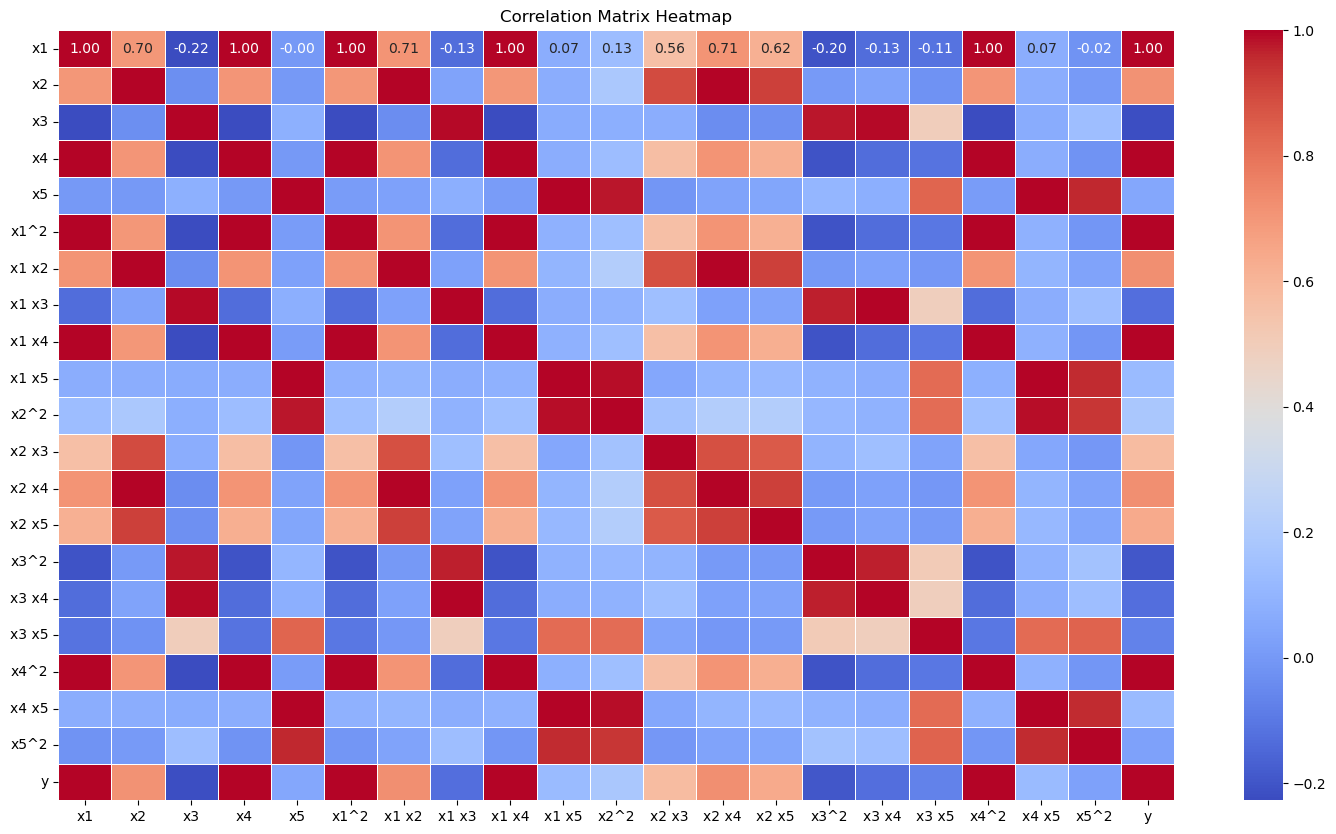

In [493]:
plt.figure(figsize=(18, 10))
sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


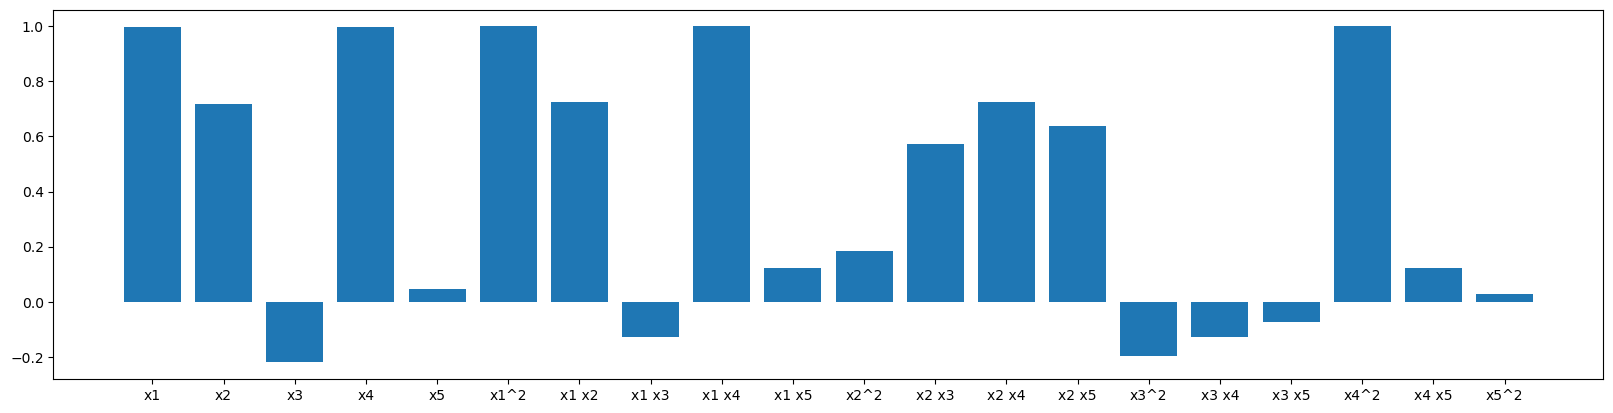

In [445]:
## plot the correlation matrix in a bar plot such that the effectiveness of a feature is very clear 
output_map = corr_matrix['y']
features = np.array(X_poly_df.columns)

f = plt.figure()
plt.bar(features, output_map[:-1])
f.set_figwidth(20)
plt.show()

In [475]:
# Remove those features which has correlation less than 0.7
cor=np.array(corr_matrix['y'])
cor=np.delete(cor,-1)
drop_cols=np.array(features)[cor<0.7]
drop_cols

array(['x3', 'x5', 'x1 x3', 'x1 x5', 'x2^2', 'x2 x3', 'x2 x5', 'x3^2',
       'x3 x4', 'x3 x5', 'x4 x5', 'x5^2'], dtype=object)

In [474]:
dc = [ 'x5','x1','x1^2','x1 x2','x1 x3', 'x1 x5', 'x2 x3', 'x2 x5', 'x3^2', 'x2^2', 'x2 x4','x3',
       'x3 x5','x1 x4' ,'x5^2','y','x3 x4']## this dc list is used to test manually by removing or adding the columns and checking the loss 
X = df_poly.drop(dc,axis=1)
X

,x2,x4,x4^2,x4 x5
0,-447.71,92.41,8539.61,8875.06
1,-455.33,91.76,8419.90,8456.60
2,-466.86,89.54,8017.41,8954.00
3,-440.53,94.24,8881.18,7976.47
4,-445.92,94.11,8856.69,8315.56
...,...,...,...,...
96,479.03,102.18,10440.75,9028.62
97,489.50,108.85,11848.32,8816.85
98,496.95,108.16,11698.59,9968.03
99,546.88,108.83,11843.97,10883.00


In [473]:
# Now check the RMSE of cleaned data 

y = df_poly['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


loss =SSE(y_test,y_pred)


print(loss)

print("RMSE of degree 2 model:",np.sqrt(loss/101))


102.81598520356567
RMSE of degree 2 model: 1.0089499747363355


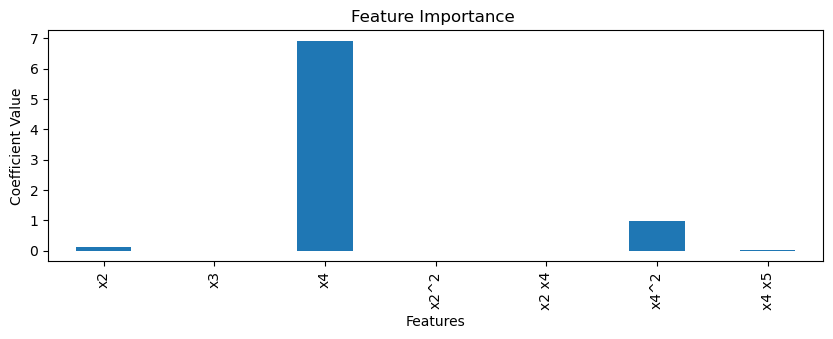

In [458]:

plt.figure(figsize=(10, 3))
coefs = pd.Series(model.coef_,index=X.columns)
coefs.plot(kind='bar')
plt.title('Feature Importance ')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()


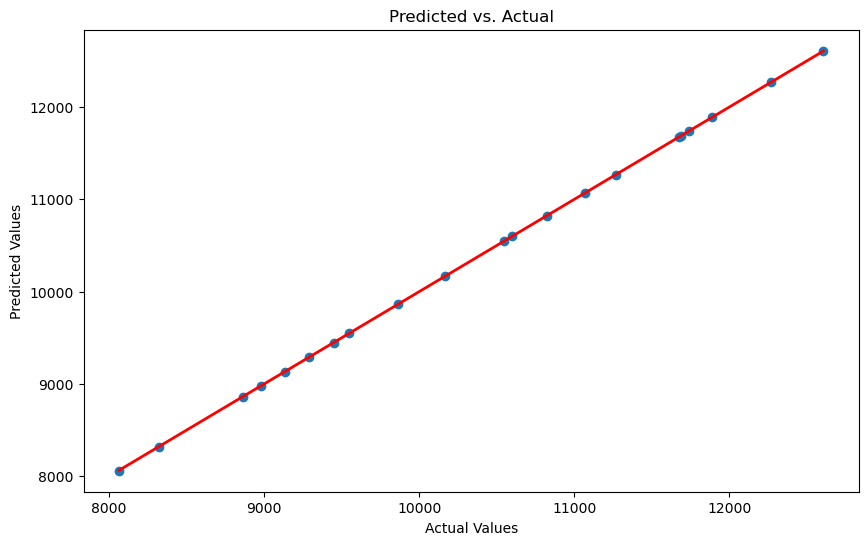

In [472]:

# Predicted vs. Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual')
plt.show()


## TASK 4 
#### Using LazyRegressor to predict best regression fit with low RMSE 

In [477]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [478]:
from lazypredict.Supervised import LazyRegressor 
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None) 
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:01<00:00, 23.34it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 4
[LightGBM] [Info] Start training from score 10210.802649
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

#### Comparing my models to LazyRegressor Models:

1. My minmax scaler model RMSE : 0.01 
   --> using lazyregressor the least RMSE (LassoCV): 0.01 
2. My Standard scaler model RMSE : 0.02
   --> using lazyregressor the least RMSE  (KernelRidge) : 0.04
3. My Polynomial degree 2 model RMSE : 1.00
   --> using lazyregressor the least RMSE  (RANSAC Regressor): 2.21 


#### Conclusion :
1. lazy regressor provides a good base model for regression model ,but we can optimize it further by selecting specific features.
2. LazyRegressor might use default hyperparameters for each model, which may not be optimal. models could have been tuned or may have different settings, leading to better performance as i did it with this dataset.
3. Here minmax scaling method given same RMSE as lazyregressor model but other 2 models given less RMSE compared to lazyregressor. Therefore hyperparamter tuning or introducing non linearity into the dataset might help to reduce the loss even more.